In [ ]:
# Make sure to use a GPU to train these models: 20x faster.
# Edit > Notebook settings > Hardware accelerator: GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### Util: plot_confusion_matrix()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  #print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

### Load data

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Load in the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# Scale the pixels to 0..1 range
x_train, x_test = x_train / 255.0, x_test / 255.0
# If missing, we need to add the color dimension explicitly (expected by the Conv2D layer).
if x_train.ndim < 4:
  x_train, x_test = x_train[:,:,:,np.newaxis], x_test[:,:,:,np.newaxis]
shape = x_train[0].shape
# Labels
labels = ['T-shirt/top', 'Trouser',	'Pullover', 'Dress', 'Coat',	'Sandal', 'Shirt', 'Sneaker',	'Bag', 'Ankle boot']
# Number of classes
K = len(labels)

print(f'Ntrain={len(y_train)}, Ntest={len(y_test)}, K={K}, shape={shape}')

4422102/4422102 [==============================] - 0s 0us/step
Ntrain=60000, Ntest=10000, K=10, shape=(28, 28, 1)


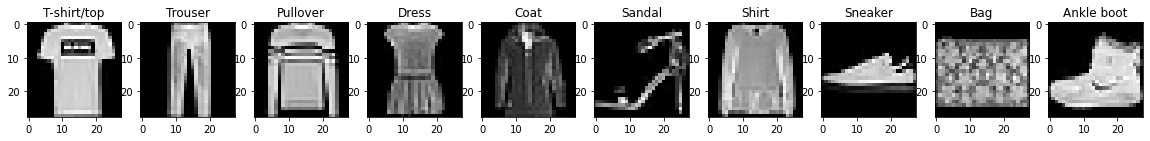

In [ ]:
# Plot one sample from each class
fig, ax = plt.subplots(ncols=K, figsize=(20,5))
for i in range(K):
  idx = np.where(y_train == i)[0][0]
  x = x_train[idx,:,:,0] if x_train.shape[3] == 1 else x_train[idx,:,:]
  ax[i].imshow(x, cmap='gray');
  ax[i].set_title(labels[y_train[idx]]);

### Model with GlobalMaxPool layer

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, BatchNormalization, GlobalMaxPool2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

i = Input(shape=x_train[0].shape)
x = Conv2D(32, 3, activation='relu', padding='same')(i); x = BatchNormalization()(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x); x = BatchNormalization()(x)
x = MaxPool2D(2)(x)
x = Conv2D(64, 3, activation='relu', padding='same')(x); x = BatchNormalization()(x)
x = MaxPool2D(2)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x); x = BatchNormalization()(x)
x = GlobalMaxPool2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(K)(x)
model = Model(i, x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0     

In [ ]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 5ms/step - loss: 0.4869 - accuracy: 0.8274 - val_loss: 0.3762 - val_accuracy: 0.8617
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3169 - accuracy: 0.8860 - val_loss: 0.2923 - val_accuracy: 0.8917
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2708 - accuracy: 0.9025 - val_loss: 0.2589 - val_accuracy: 0.9053
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2472 - accuracy: 0.9100 - val_loss: 0.2624 - val_accuracy: 0.9054
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2221 - accuracy: 0.9179 - val_loss: 0.2401 - val_accuracy: 0.9121
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2083 - accuracy: 0.9240 - val_loss: 0.2290 - val_accuracy: 0.9174
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1882 - accuracy: 0.9319 - val_loss: 0.2349 - val_accurac

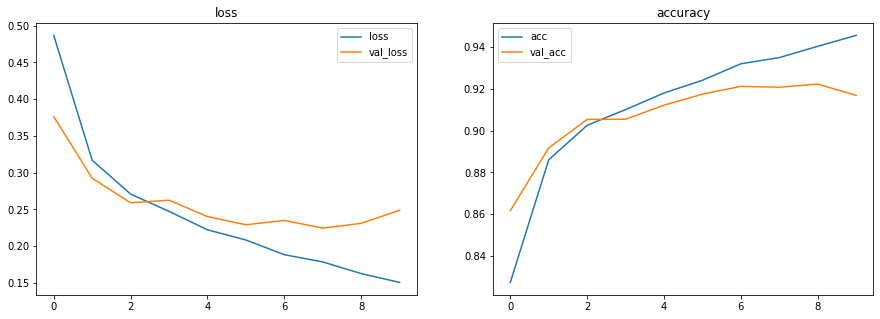

In [ ]:
# Plot loss and accuracy per epoch
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].plot(r.history['loss'], label='loss')
ax[0].plot(r.history['val_loss'], label='val_loss')
ax[0].set_title('loss')
ax[0].legend()
ax[1].plot(r.history['accuracy'], label='acc')
ax[1].plot(r.history['val_accuracy'], label='val_acc')
ax[1].set_title('accuracy')
ax[1].legend();

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


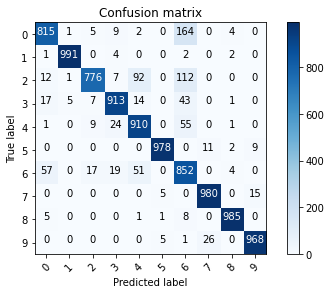

In [ ]:
# Plot confusion matrix
y_pred = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, list(range(K)))

### Model with Flatten layer

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, BatchNormalization, Flatten, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

i = Input(shape=x_train[0].shape)
x = Conv2D(32, 3, activation='relu', padding='same')(i); x = BatchNormalization()(x)
x = Conv2D(32, 3, activation='relu', padding='same')(x); x = BatchNormalization()(x)
x = MaxPool2D(2)(x)
x = Conv2D(64, 3, activation='relu', padding='same')(x); x = BatchNormalization()(x)
x = MaxPool2D(2)(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x); x = BatchNormalization()(x)
x = Flatten()(x)  # Replacing GlobalMaxPool2D. Much bigger model!
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(K)(x)
model2 = Model(i, x)

model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0   

In [ ]:
model2.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])

r2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4279 - accuracy: 0.8508 - val_loss: 0.3081 - val_accuracy: 0.8856
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2825 - accuracy: 0.9000 - val_loss: 0.2920 - val_accuracy: 0.8964
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2408 - accuracy: 0.9129 - val_loss: 0.2808 - val_accuracy: 0.9056
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2122 - accuracy: 0.9236 - val_loss: 0.2338 - val_accuracy: 0.9132
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1909 - accuracy: 0.9308 - val_loss: 0.2442 - val_accuracy: 0.9199
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1682 - accuracy: 0.9388 - val_loss: 0.2526 - val_accuracy: 0.9186
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1549 - accuracy: 0.9431 - val_loss: 0.2476 - val_accurac

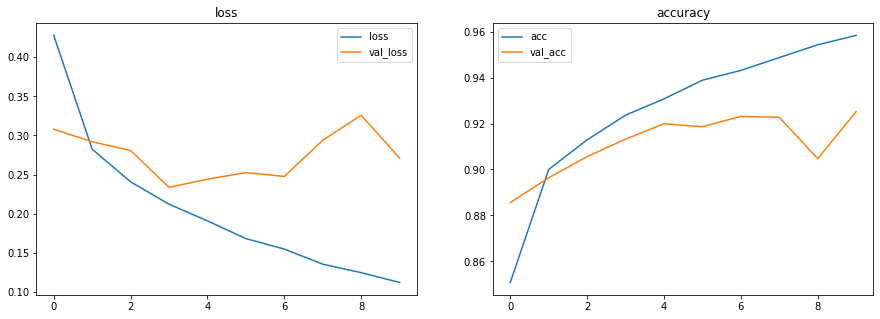

In [ ]:
# Plot loss and accuracy per epoch
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
ax[0].plot(r2.history['loss'], label='loss')
ax[0].plot(r2.history['val_loss'], label='val_loss')
ax[0].set_title('loss')
ax[0].legend()
ax[1].plot(r2.history['accuracy'], label='acc')
ax[1].plot(r2.history['val_accuracy'], label='val_acc')
ax[1].set_title('accuracy')
ax[1].legend();

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization


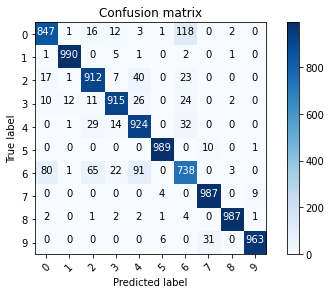

In [ ]:
# Plot confusion matrix
y_pred2 = model2.predict(x_test).argmax(axis=1)
cm2 = confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm2, list(range(K)))